In [64]:
import pandas as pd
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

import os

# Set the OMP_NUM_THREADS environment variable to 4
os.environ["OMP_NUM_THREADS"] = "4"


pd.set_option('display.max_columns', None)

### Load the dataset (assuming each group is in a separate CSV file)


In [97]:
# # Load the CBSA data from the parquet file
test = gpd.read_parquet('cbsa.parquet')
name = gpd.read_parquet(r'C:\Users\Jerem\OneDrive\Documents\Git Projects\MeridianXYZ\data\admin_boundaries\processed\geo_complex\04_cbsa_complex.parquet')


In [ ]:

# # Drop the geometry column
# age_and_sex = age_and_sex.drop(columns=['geometry'])
# age_and_sex.head(1)


variables_age_and_sex = gpd.read_parquet('variables_age_and_sex.parquet').drop(columns=['geometry']).fillna(0)
variables_commute = gpd.read_parquet('variables_commute.parquet').drop(columns=['geometry']).fillna(0)
variables_computers_and_internet = gpd.read_parquet('variables_computers_and_internet.parquet').drop(columns=['geometry']).fillna(0)
variables_education = gpd.read_parquet('variables_education.parquet').drop(columns=['geometry']).fillna(0)
variables_employement = gpd.read_parquet('variables_employement.parquet').drop(columns=['geometry']).fillna(0)
variables_housing = gpd.read_parquet('variables_housing.parquet').drop(columns=['geometry']).fillna(0)
variables_income_and_earnings = gpd.read_parquet('variables_income_and_earnings.parquet').drop(columns=['geometry']).fillna(0)
variables_poverty = gpd.read_parquet('variables_poverty.parquet').drop(columns=['geometry']).fillna(0)
variables_race_and_hispanic_origin = gpd.read_parquet('variables_race_and_hispanic_origin.parquet').drop(columns=['geometry']).fillna(0)

In [98]:
name.head()

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,NAME,geometry,GEOID
0,10100,"Aberdeen, SD Micro Area","POLYGON ((-99.70847 45.31824, -99.70837 45.332...",CBSA 10100
1,10140,"Aberdeen, WA Micro Area","MULTIPOLYGON (((-123.88453 46.96579, -123.8771...",CBSA 10140
2,10180,"Abilene, TX Metro Area","POLYGON ((-100.15184 32.09064, -100.15170 32.1...",CBSA 10180
3,10220,"Ada, OK Micro Area","POLYGON ((-96.93249 34.69496, -96.93249 34.767...",CBSA 10220
4,10300,"Adrian, MI Micro Area","POLYGON ((-84.36330 42.07346, -84.33584 42.073...",CBSA 10300


In [70]:
# Hierarchical Clustering
def hierarchical_clustering(data, group_name='group', num=0):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Perform Agglomerative Clustering to generate dendrogram
    plt.figure(figsize=(100, 60))
    dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
    plt.title(f'{group_name} Dendrogram')
    plt.xlabel('CBSA')
    plt.ylabel('Euclidean Distances')
    plt.axhline(y=num, color='r', linestyle='--')  # Example cut-off to show clusters
    plt.show()

# K-Means Clustering
def cluster_group(data, n_clusters=5, group_name='group', method='kmeans'):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Choose clustering method
    if method == 'kmeans':
        model = KMeans(n_clusters=n_clusters, random_state=42)
    elif method == 'dbscan':
        model = DBSCAN(eps=0.5, min_samples=5)
    elif method == 'gmm':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
    else:
        raise ValueError("Invalid method. Choose from 'kmeans', 'dbscan', or 'gmm'.")
    
    # Fit the model and predict clusters
    if method == 'gmm':
        clusters = model.fit_predict(data_scaled)
    else:
        clusters = model.fit(data_scaled).fit_predict(data_scaled)
    
    # Add cluster labels to the original dataframe
    data[group_name + '_cluster'] = clusters
    
    # Return clustered data
    return data


### Step 1: Hierarchical Clustering for exploration


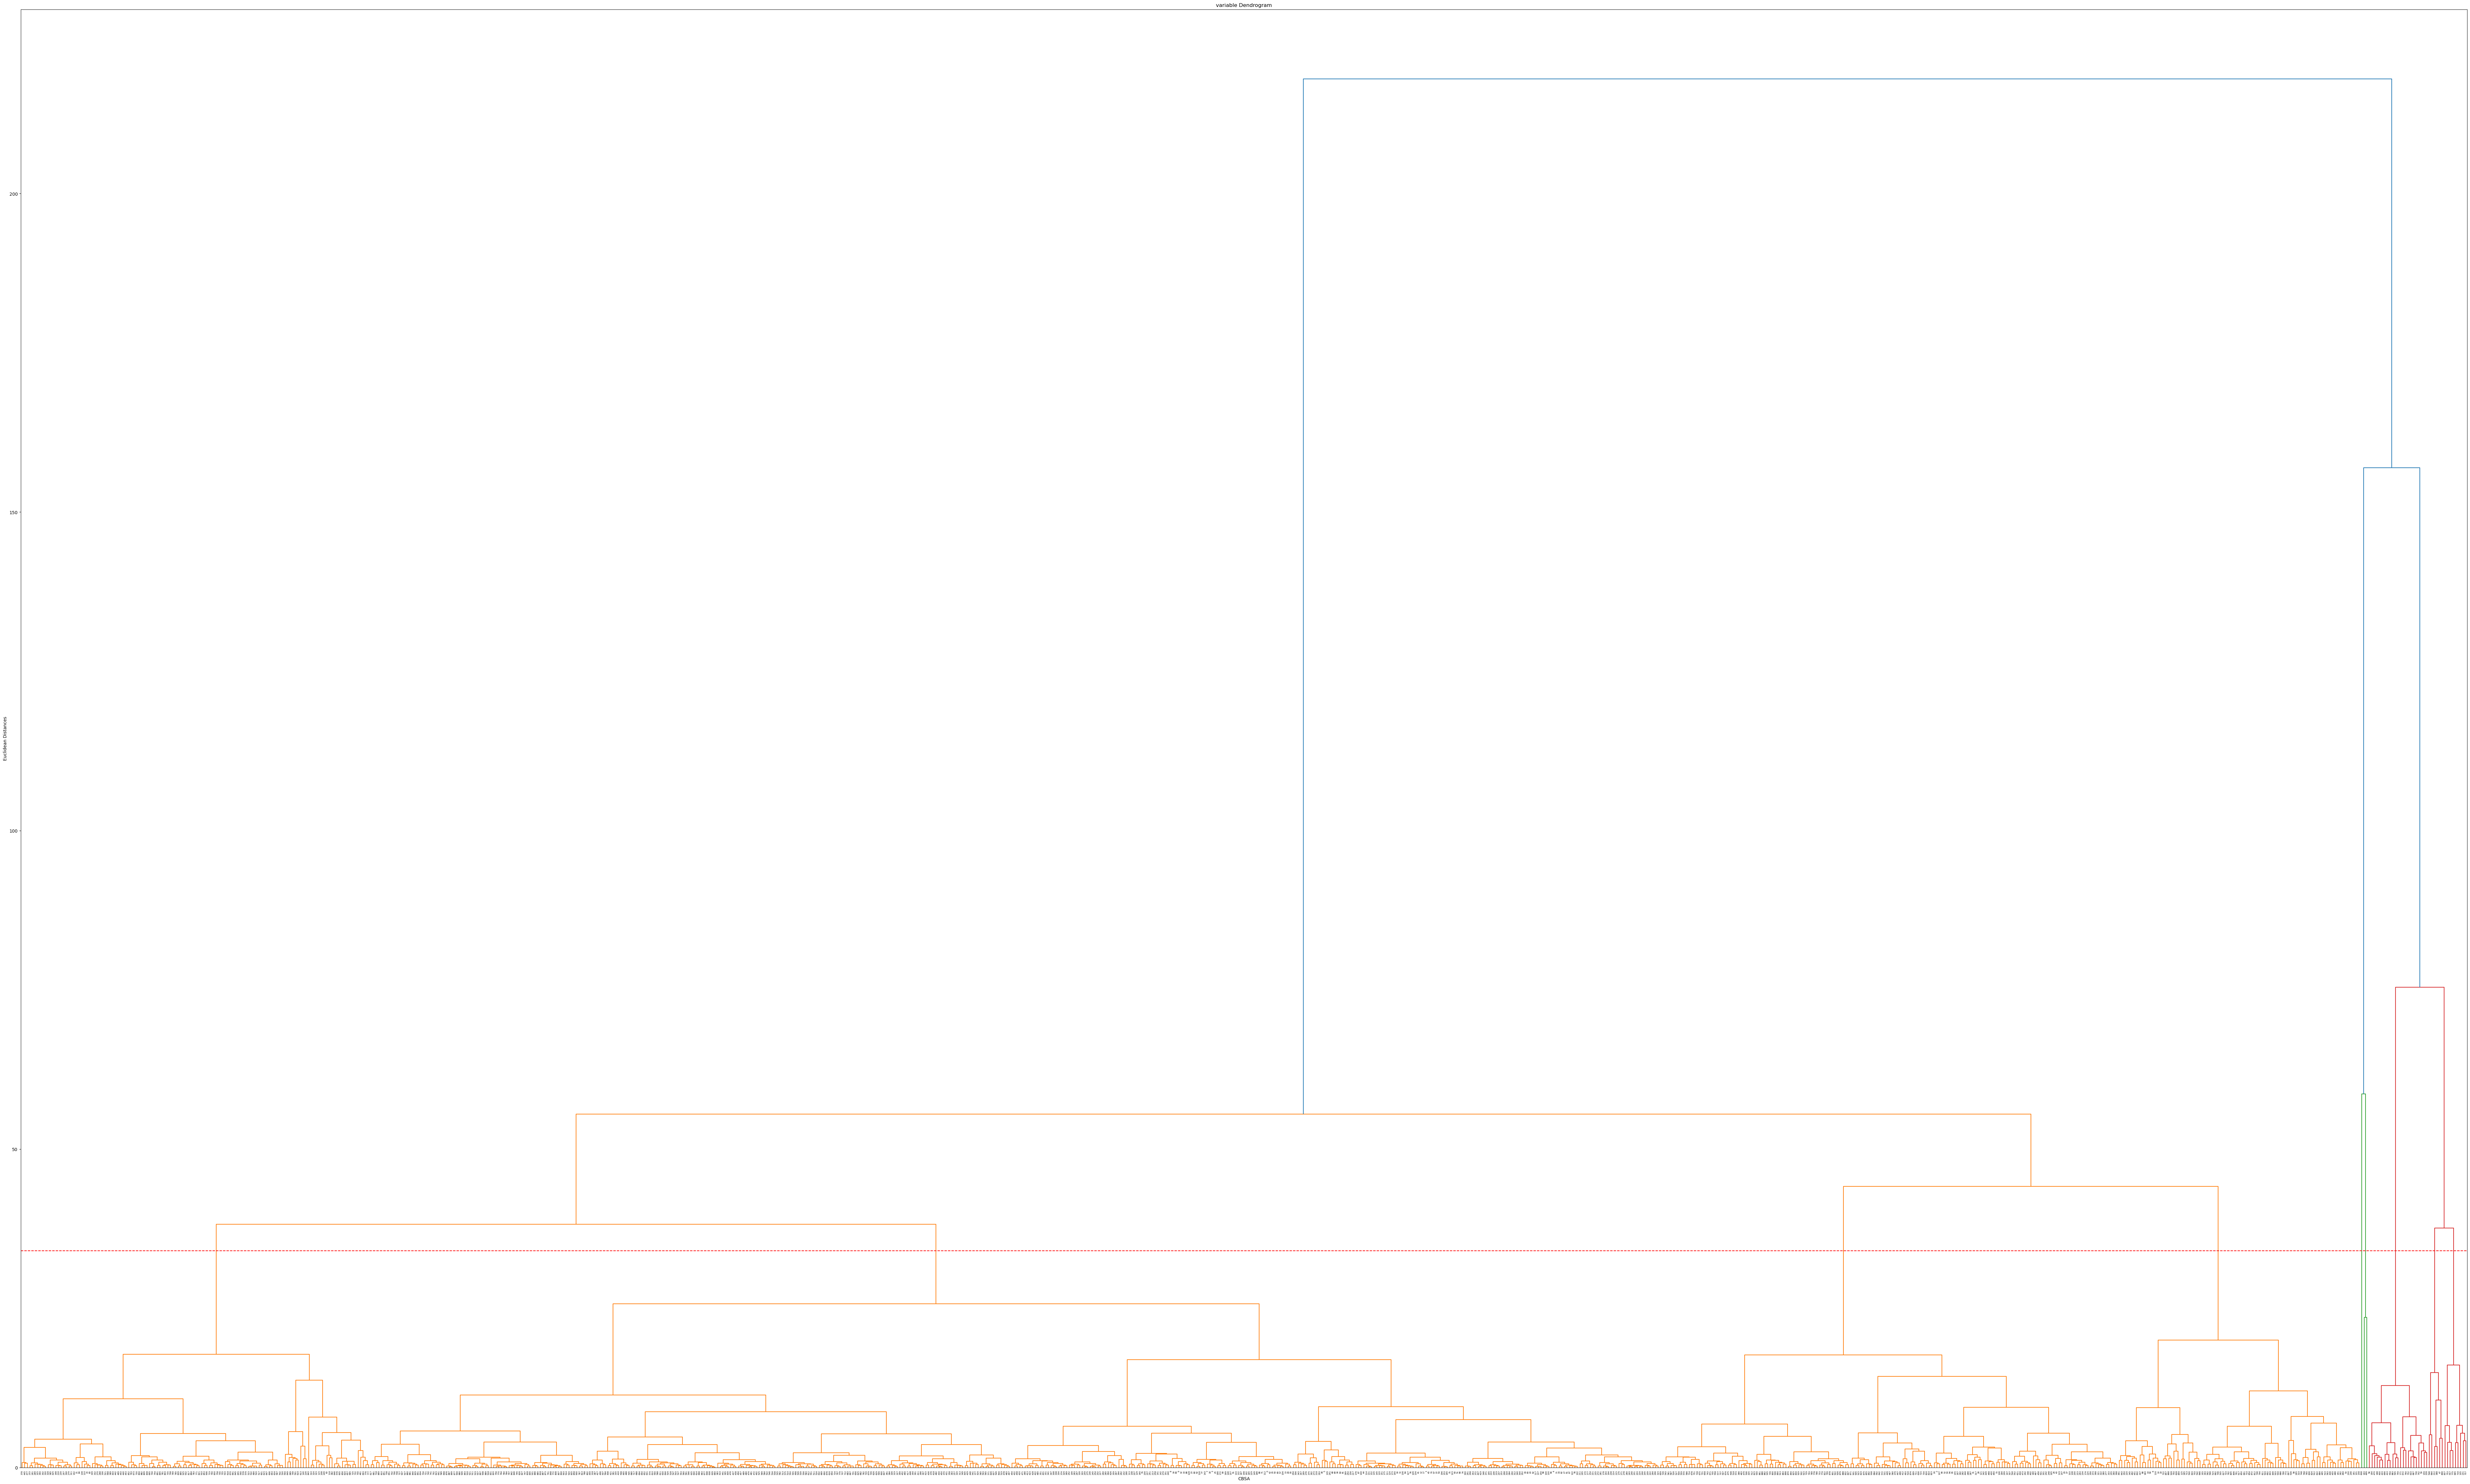

In [43]:
variable = variables_age_and_sex
# variable = variables_commute
# variable = variables_computers_and_internet
# variable = variables_education
# variable = variables_employement
# variable = variables_housing
# variable = variables_income_and_earnings
# variable = variables_poverty
# variable = variables_race_and_hispanic_origin


hierarchical_clustering(variable, group_name='variable', num=34)
# hierarchical_clustering(commute, group_name='commute')
# hierarchical_clustering(computers_and_internet, group_name='computers_and_internet')
# # Repeat for other groups...


In [62]:
# variables_education['B20004_002E'] = variables_education['B20004_002E'].fillna(0)

variables_education['B20004_018E'] = variables_education.apply(
    lambda row: row['B20004_006E'] - row['B20004_012E'] if pd.isna(row['B20004_018E']) and not pd.isna(row['B20004_012E']) and not pd.isna(row['B20004_006E']) else row['B20004_018E'],
    axis=1
)

variables_education.loc[:, [
    'METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA', 'B20004_002E',
    'B20004_003E', 'B20004_004E', 'B20004_005E', 'B20004_006E', 'B20004_008E', 
    'B20004_009E', 'B20004_010E', 'B20004_011E', 'B20004_012E', 'B20004_014E', 
    'B20004_015E', 'B20004_016E', 'B20004_017E', 'B20004_018E'
]].loc[variables_education.isna().any(axis=1)]

# nan_rows.loc[:, ['METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA'] + nan_rows.columns[nan_rows.isna().any()].tolist()]



# # Check for NaN values in the specified columns and replace them with 0
# columns_to_check = [
#     'B20004_002E', 'B20004_003E', 'B20004_004E', 'B20004_005E', 'B20004_006E',
#     'B20004_008E', 'B20004_009E', 'B20004_010E', 'B20004_011E', 'B20004_012E',
#     'B20004_014E', 'B20004_015E', 'B20004_016E', 'B20004_017E', 'B20004_018E'
# ]

# variables_education[columns_to_check] = variables_education[columns_to_check].fillna(0)

# 'B20004_002E',
# 'B20004_003E',
# 'B20004_004E',
# 'B20004_005E',
# 'B20004_006E',
# 'B20004_008E', 
# 'B20004_009E', 
# 'B20004_010E', 
# 'B20004_011E',
# 'B20004_012E', 
# 'B20004_014E', 
# 'B20004_015E', 
# 'B20004_016E',
# 'B20004_017E', 
# 'B20004_018E'

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,B20004_002E,B20004_003E,B20004_004E,B20004_005E,B20004_006E,B20004_008E,B20004_009E,B20004_010E,B20004_011E,B20004_012E,B20004_014E,B20004_015E,B20004_016E,B20004_017E,B20004_018E
29,11380,36732.0,41168,54007,56250.0,59375.0,50711.0,55320,70574,140060.0,NaN,30717.0,31354,31524,42344,56705.0
42,11860,41250.0,30444,30775,46691.0,62574.0,41875.0,41136,43140,60814.0,62794.0,NaN,23640,25605,38846,54375.0
43,11900,18553.0,29670,31223,36167.0,62606.0,22750.0,34709,36925,45516.0,61025.0,NaN,25066,26409,30174,67654.0
49,12120,23727.0,27047,30460,43870.0,47462.0,32377.0,32571,38922,64176.0,NaN,14607.0,21019,24403,39137,50278.0
62,12680,23667.0,35011,39331,55847.0,59002.0,31719.0,41433,55247,70087.0,62619.0,NaN,26375,30474,50696,58738.0
72,13100,16477.0,31418,35913,47121.0,63902.0,21233.0,36950,47813,53179.0,67875.0,NaN,17132,30354,44519,63523.0
120,15140,23882.0,31024,30685,41192.0,49457.0,25909.0,35096,32279,41163.0,72614.0,NaN,26138,28784,42917,32443.0
130,15580,12429.0,24869,29623,51511.0,67375.0,NaN,30254,40035,54044.0,78462.0,11693.0,22410,23684,49016,56885.0
136,15780,22122.0,24441,31404,45938.0,69628.0,20581.0,31250,45037,48986.0,84494.0,NaN,21181,25564,41676,57981.0
190,18220,29260.0,32572,40458,47423.0,50130.0,42292.0,40398,55981,57729.0,NaN,12917.0,18804,27904,44012,50547.0


### Step 2: Cluster each group independently based on hierarchical insights


In [71]:
# Assume we decided on 5 clusters from the dendrogram
age_and_sex_clustered = cluster_group(variables_age_and_sex, n_clusters=10, group_name='age_and_sex', method='kmeans')
commute_clustered = cluster_group(variables_commute, n_clusters=10, group_name='commute', method='kmeans')
computers_and_internet_clustered = cluster_group(variables_computers_and_internet, n_clusters=10, group_name='computers_and_internet', method='kmeans')
education_clustered = cluster_group(variables_education, n_clusters=10, group_name='education', method='kmeans')
employement_clustered = cluster_group(variables_employement, n_clusters=10, group_name='employement', method='kmeans')
housing_clustered = cluster_group(variables_housing, n_clusters=10, group_name='housing', method='kmeans')
income_and_earnings_clustered = cluster_group(variables_income_and_earnings, n_clusters=10, group_name='income_and_earnings', method='kmeans')
poverty_clustered = cluster_group(variables_poverty, n_clusters=10, group_name='poverty', method='kmeans')
race_and_hispanic_origin_clustered = cluster_group(variables_race_and_hispanic_origin, n_clusters=10, group_name="race", method='kmeans')


c:\Users\Jerem\miniconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jerem\miniconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jerem\miniconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Jerem\miniconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

In [76]:
race_and_hispanic_origin_clustered.head()

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,B19301_001E,race_cluster
0,10100,39150,1033,1909,1482,53,258,33591,8
1,10140,67062,1525,4913,1652,594,1804,27277,3
2,10180,138051,16019,2748,4274,131,19144,26737,3
3,10220,30733,1617,10125,533,68,773,27038,3
4,10300,94588,3680,1303,818,34,1792,28695,3


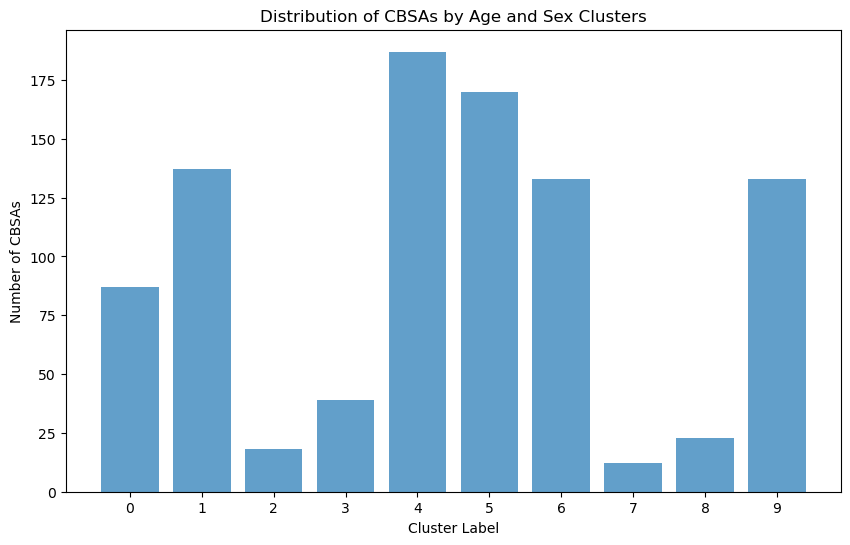

In [78]:
# Example: Plot the clusters for one group as a bar chart
cluster_counts = income_and_earnings_clustered['income_and_earnings_cluster'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, align='center', alpha=0.7)
plt.xlabel('Cluster Label')
plt.ylabel('Number of CBSAs')
plt.title('Distribution of CBSAs by Age and Sex Clusters')
plt.xticks(cluster_counts.index)
plt.show()


### Step 3: Combine clustered data


c:\Users\Jerem\miniconda3\envs\ox\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


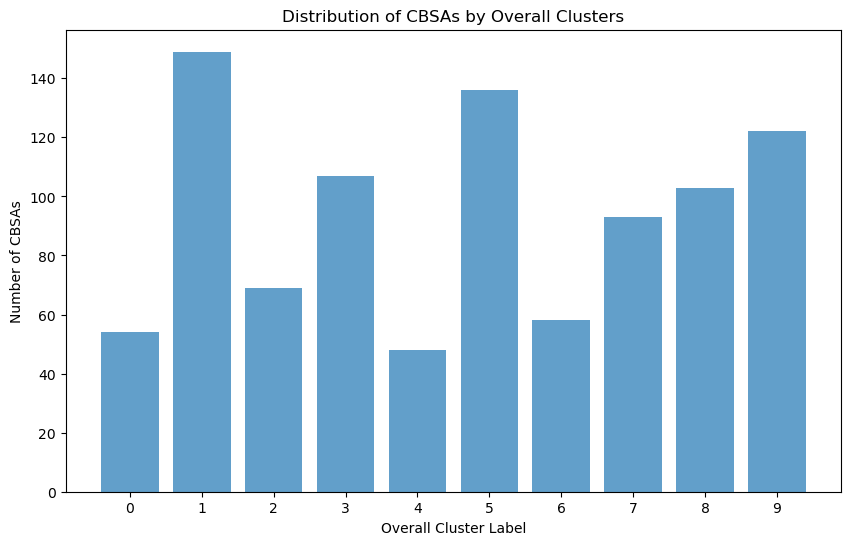

In [88]:
combined_data = age_and_sex_clustered[['age_and_sex_cluster']].join(commute_clustered[['commute_cluster']], how='inner')
combined_data = combined_data.join(computers_and_internet_clustered[['computers_and_internet_cluster']], how='inner')
combined_data = combined_data.join(education_clustered[['education_cluster']], how='inner')
combined_data = combined_data.join(employement_clustered[['employement_cluster']], how='inner')
combined_data = combined_data.join(housing_clustered[['housing_cluster']], how='inner')
combined_data = combined_data.join(income_and_earnings_clustered[['income_and_earnings_cluster']], how='inner')
combined_data = combined_data.join(poverty_clustered[['poverty_cluster']], how='inner')
combined_data = combined_data.join(race_and_hispanic_origin_clustered[['race_cluster']], how='inner')


# # Step 4: Normalize the combined data
# combined_data_scaled = scaler.fit_transform(combined_data)

# Step 5: Cluster the combined data using KMeans (or another method based on insights)
combined_kmeans = KMeans(n_clusters=10, random_state=42)
combined_clusters = combined_kmeans.fit_predict(combined_data)

# Add combined cluster labels
combined_data['overall_cluster'] = combined_clusters
combined_data = combined_data.join(test[['METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA','geometry']], how='inner')

# Plot the distribution of CBSAs by overall clusters
plt.figure(figsize=(10, 6))
cluster_counts = combined_data['overall_cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, align='center', alpha=0.7)
plt.xlabel('Overall Cluster Label')
plt.ylabel('Number of CBSAs')
plt.title('Distribution of CBSAs by Overall Clusters')
plt.xticks(cluster_counts.index)
plt.show()


In [104]:
combined_data

,age_and_sex_cluster,commute_cluster,computers_and_internet_cluster,education_cluster,employement_cluster,housing_cluster,income_and_earnings_cluster,poverty_cluster,race_cluster,overall_cluster,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,geometry,NAME
0,0,8,6,9,0,0,4,0,8,2,10100,"POLYGON ((-99.70847 45.31824, -99.70837 45.332...","Aberdeen, SD Micro Area"
1,0,8,6,9,0,7,5,0,3,8,10140,"MULTIPOLYGON (((-123.88453 46.96579, -123.8771...","Aberdeen, WA Micro Area"
2,9,8,6,5,0,7,5,0,3,8,10180,"POLYGON ((-100.15184 32.09064, -100.15170 32.1...","Abilene, TX Metro Area"
3,0,8,6,9,0,0,6,0,3,2,10220,"POLYGON ((-96.93249 34.69496, -96.93249 34.767...","Ada, OK Micro Area"
4,0,8,6,9,0,0,4,0,3,2,10300,"POLYGON ((-84.36330 42.07346, -84.33584 42.073...","Adrian, MI Micro Area"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,4,3,9,5,7,4,9,4,6,1,49660,"POLYGON ((-81.08671 40.93042, -81.08669 40.931...","Youngstown-Warren-Boardman, OH-PA Metro Area"
935,9,3,2,5,8,7,4,6,6,9,49700,"POLYGON ((-121.94828 39.24177, -121.94737 39.2...","Yuba City, CA Metro Area"
936,9,3,2,2,8,7,9,6,6,3,49740,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...","Yuma, AZ Metro Area"
937,5,3,2,5,8,0,9,6,6,3,49780,"POLYGON ((-82.23373 39.92058, -82.23168 39.947...","Zanesville, OH Micro Area"


In [101]:
combined_data = combined_data.join(name[['NAME']], how='inner')
combined_data = gpd.GeoDataFrame(combined_data, geometry='geometry')


In [102]:
combined_data

,age_and_sex_cluster,commute_cluster,computers_and_internet_cluster,education_cluster,employement_cluster,housing_cluster,income_and_earnings_cluster,poverty_cluster,race_cluster,overall_cluster,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,geometry,NAME
0,0,8,6,9,0,0,4,0,8,2,10100,"POLYGON ((-99.70847 45.31824, -99.70837 45.332...","Aberdeen, SD Micro Area"
1,0,8,6,9,0,7,5,0,3,8,10140,"MULTIPOLYGON (((-123.88453 46.96579, -123.8771...","Aberdeen, WA Micro Area"
2,9,8,6,5,0,7,5,0,3,8,10180,"POLYGON ((-100.15184 32.09064, -100.15170 32.1...","Abilene, TX Metro Area"
3,0,8,6,9,0,0,6,0,3,2,10220,"POLYGON ((-96.93249 34.69496, -96.93249 34.767...","Ada, OK Micro Area"
4,0,8,6,9,0,0,4,0,3,2,10300,"POLYGON ((-84.36330 42.07346, -84.33584 42.073...","Adrian, MI Micro Area"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,4,3,9,5,7,4,9,4,6,1,49660,"POLYGON ((-81.08671 40.93042, -81.08669 40.931...","Youngstown-Warren-Boardman, OH-PA Metro Area"
935,9,3,2,5,8,7,4,6,6,9,49700,"POLYGON ((-121.94828 39.24177, -121.94737 39.2...","Yuba City, CA Metro Area"
936,9,3,2,2,8,7,9,6,6,3,49740,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...","Yuma, AZ Metro Area"
937,5,3,2,5,8,0,9,6,6,3,49780,"POLYGON ((-82.23373 39.92058, -82.23168 39.947...","Zanesville, OH Micro Area"


In [103]:
combined_data.to_parquet('combined_clusters.parquet')